# Deep model explainability with SHAP values

In [161]:
# import torch
import numpy as np
import pandas as pd
# import shap
import h5py
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from brain_age_prediction import models, utils, viz
importlib.reload(utils)

<module 'brain_age_prediction.utils' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/utils.py'>

In [2]:
# paths to best model checkpoint
deep_model_path = 'lightweight-brain-age-prediction/nx218mm3/checkpoints/epoch=26-step=6102.ckpt'
# paths to saved predictions
save_dir = '/ritter/share/projects/laura_riedel_thesis/shap_values.hdf5'

# get brain area / network names
network_names = utils.get_network_names()

In [3]:
# load predictions
with h5py.File(save_dir, 'r') as f:
    deep_shap = f['deep']['full'][()]
print('Shape of SHAP values:', deep_shap.shape)

# load deep model
# deep_model = models.deep1DCNN.load_from_checkpoint(deep_model_path)
# deep_model.eval()

Shape of SHAP values: (5000, 100, 490)


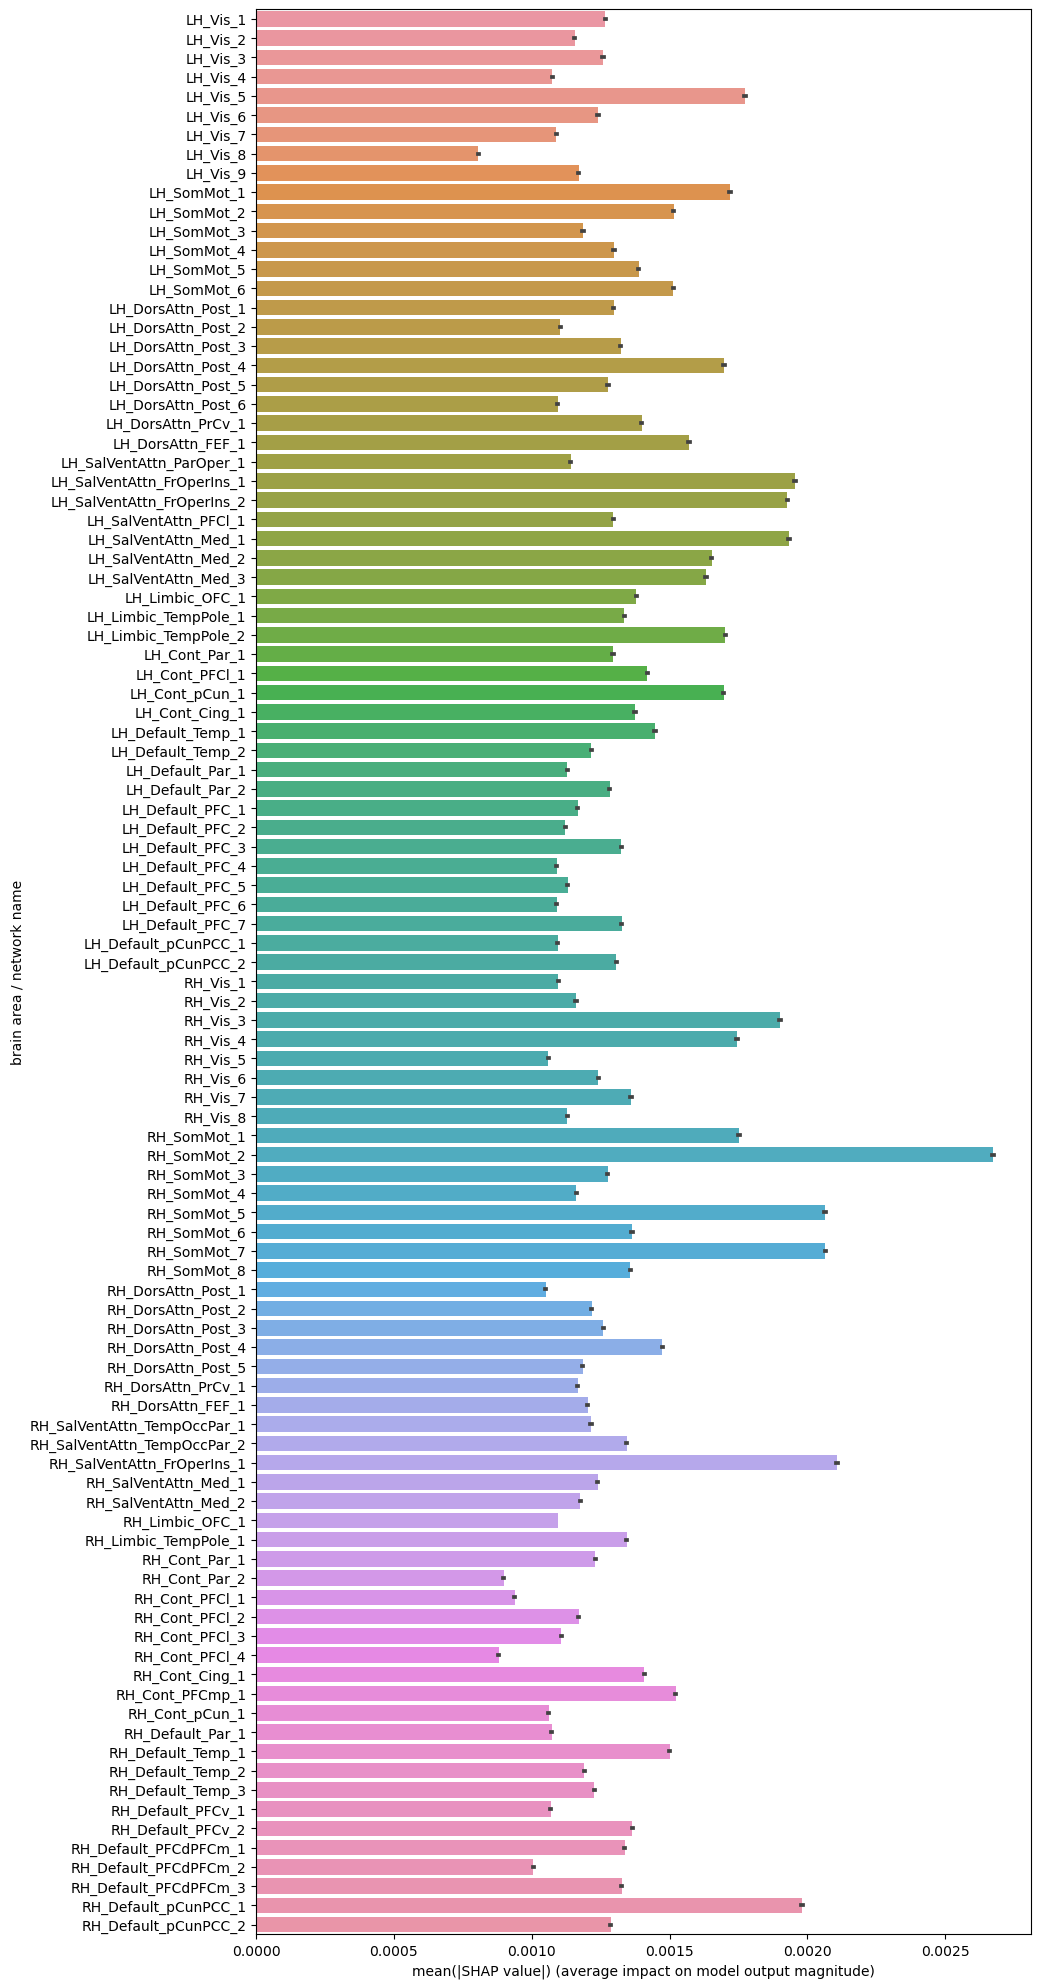

In [6]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=np.mean(np.abs(deep_shap),axis=2),
            orient='h',
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name',
       yticklabels=network_names)
plt.show()

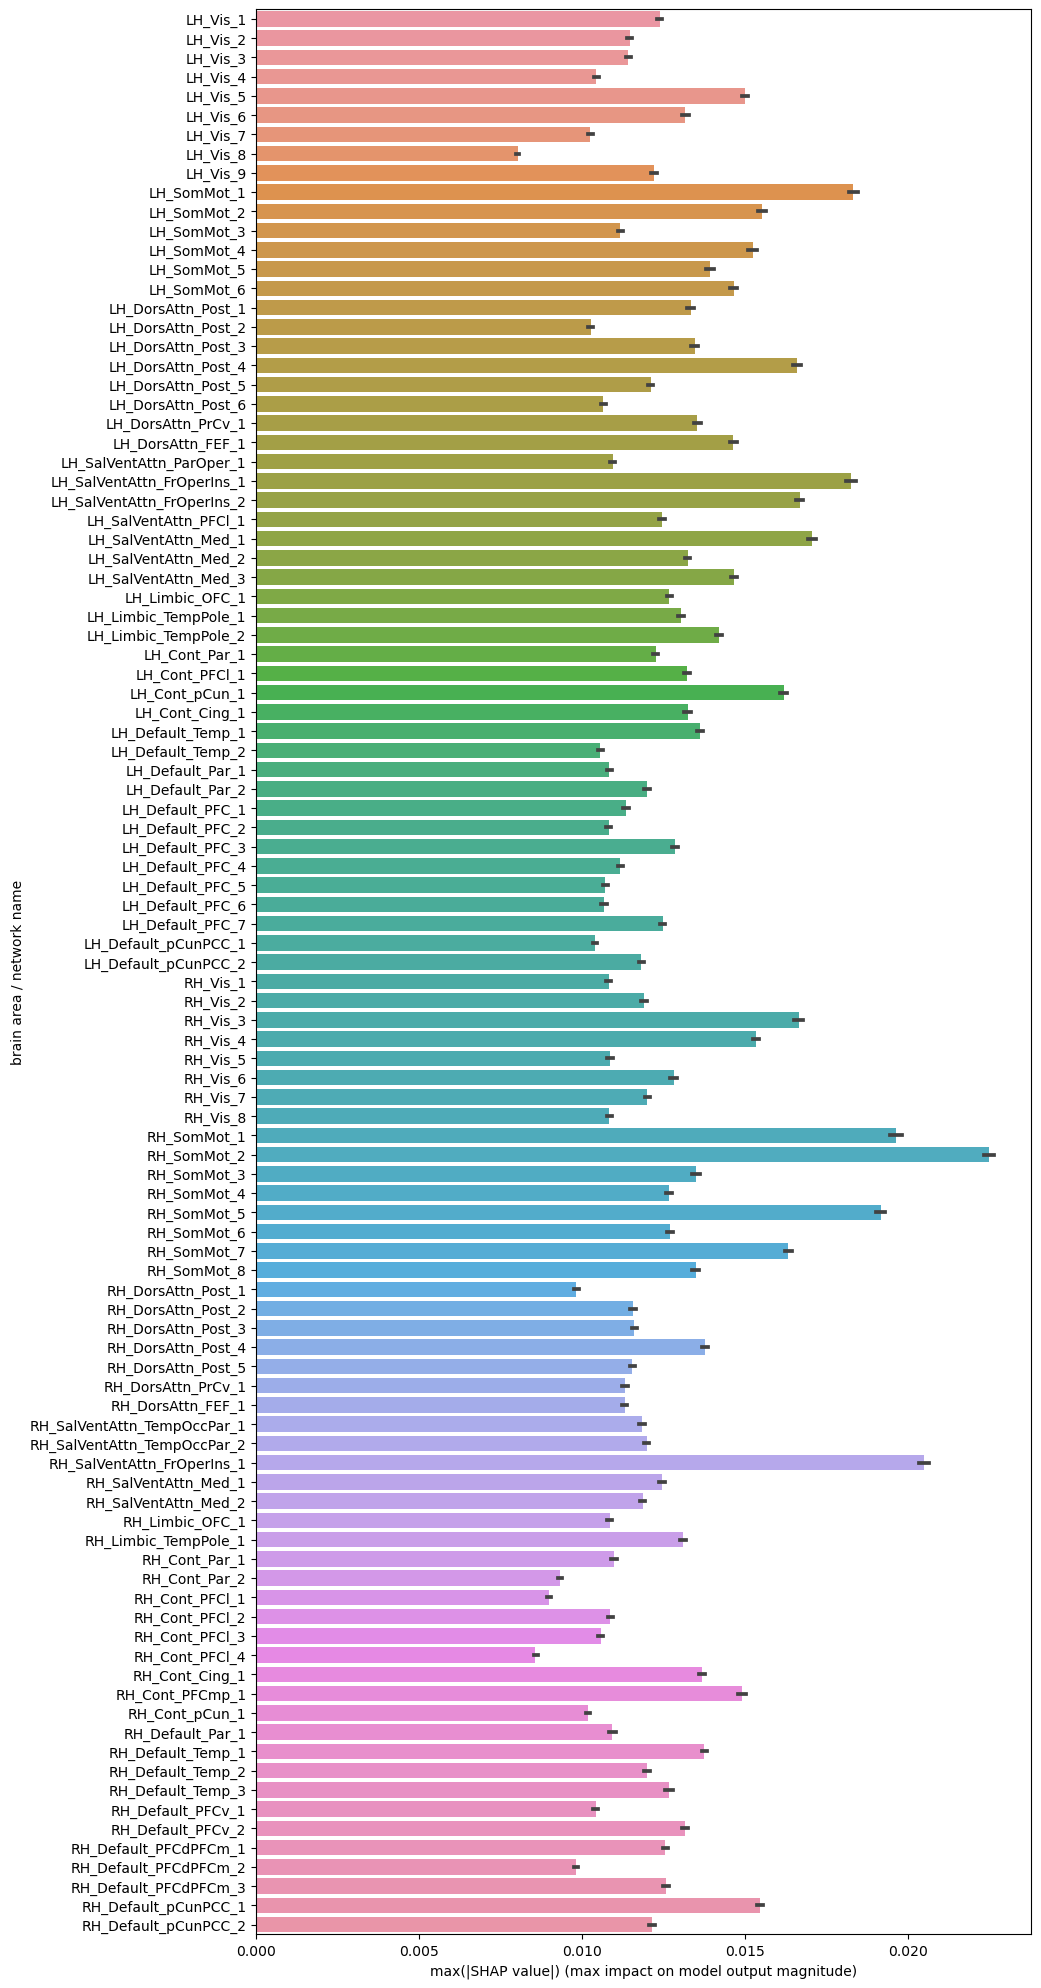

In [7]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=np.max(np.abs(deep_shap),axis=2),
            orient='h',
            ax=ax)
ax.set(xlabel='max(|SHAP value|) (max impact on model output magnitude)',
       ylabel='brain area / network name',
       yticklabels=network_names)
plt.show()

Create dataframe to sort values according to their contribution

In [8]:
deep_mean_area = np.mean(np.mean(np.abs(deep_shap),axis=2),axis=0)
deep_max_area = np.mean(np.max(np.abs(deep_shap),axis=2),axis=0)

deep_shap_df = pd.DataFrame(network_names, columns=['brain area'])
deep_shap_df['mean SHAP'] = deep_mean_area
deep_shap_df['max SHAP'] = deep_max_area

In [9]:
# 20 highest mean SHAP values
deep_shap_df.sort_values(by=['mean SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
59,RH_SomMot_2,0.002674,0.022498
75,RH_SalVentAttn_FrOperIns_1,0.002109,0.020505
64,RH_SomMot_7,0.002065,0.016336
62,RH_SomMot_5,0.002063,0.019171
98,RH_Default_pCunPCC_1,0.001980,0.015460
24,LH_SalVentAttn_FrOperIns_1,0.001954,0.018250
27,LH_SalVentAttn_Med_1,0.001932,0.017056
25,LH_SalVentAttn_FrOperIns_2,0.001927,0.016696
52,RH_Vis_3,0.001901,0.016656
4,LH_Vis_5,0.001775,0.014997


In [10]:
# 20 highest max SHAP values
deep_shap_df.sort_values(by=['max SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
59,RH_SomMot_2,0.002674,0.022498
75,RH_SalVentAttn_FrOperIns_1,0.002109,0.020505
58,RH_SomMot_1,0.001752,0.019641
62,RH_SomMot_5,0.002063,0.019171
9,LH_SomMot_1,0.001718,0.018326
24,LH_SalVentAttn_FrOperIns_1,0.001954,0.018250
27,LH_SalVentAttn_Med_1,0.001932,0.017056
25,LH_SalVentAttn_FrOperIns_2,0.001927,0.016696
52,RH_Vis_3,0.001901,0.016656
18,LH_DorsAttn_Post_4,0.001696,0.016595


In [11]:
# 20 highest mean + max SHAP values
deep_shap_df.sort_values(by=['mean SHAP', 'max SHAP'], ascending=False).head(20)

,brain area,mean SHAP,max SHAP
59,RH_SomMot_2,0.002674,0.022498
75,RH_SalVentAttn_FrOperIns_1,0.002109,0.020505
64,RH_SomMot_7,0.002065,0.016336
62,RH_SomMot_5,0.002063,0.019171
98,RH_Default_pCunPCC_1,0.001980,0.015460
24,LH_SalVentAttn_FrOperIns_1,0.001954,0.018250
27,LH_SalVentAttn_Med_1,0.001932,0.017056
25,LH_SalVentAttn_FrOperIns_2,0.001927,0.016696
52,RH_Vis_3,0.001901,0.016656
4,LH_Vis_5,0.001775,0.014997


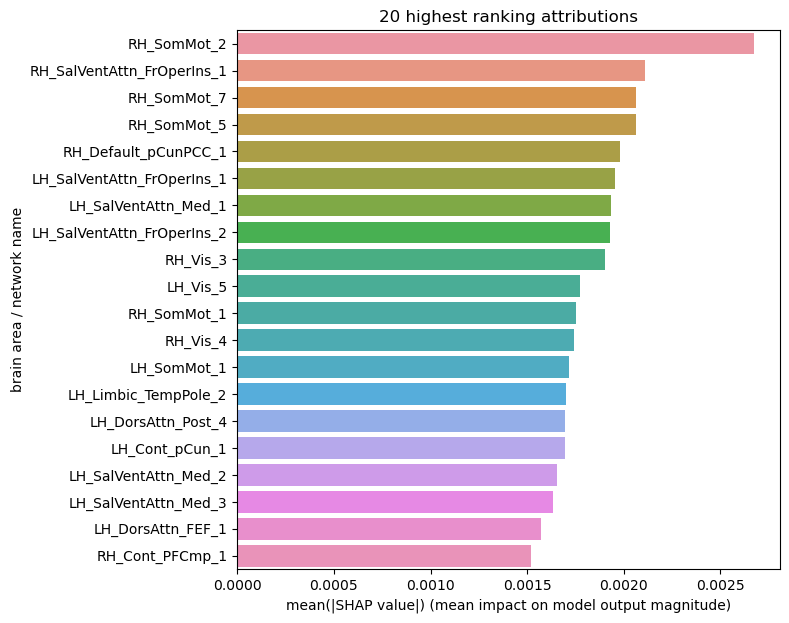

In [12]:
subset = deep_shap_df.sort_values(by=['mean SHAP'], ascending=False)[:20].copy()
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(data=subset,
            x='mean SHAP',
            y='brain area',
            orient='h',
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (mean impact on model output magnitude)',
       ylabel='brain area / network name',
       title='20 highest ranking attributions')
plt.show()

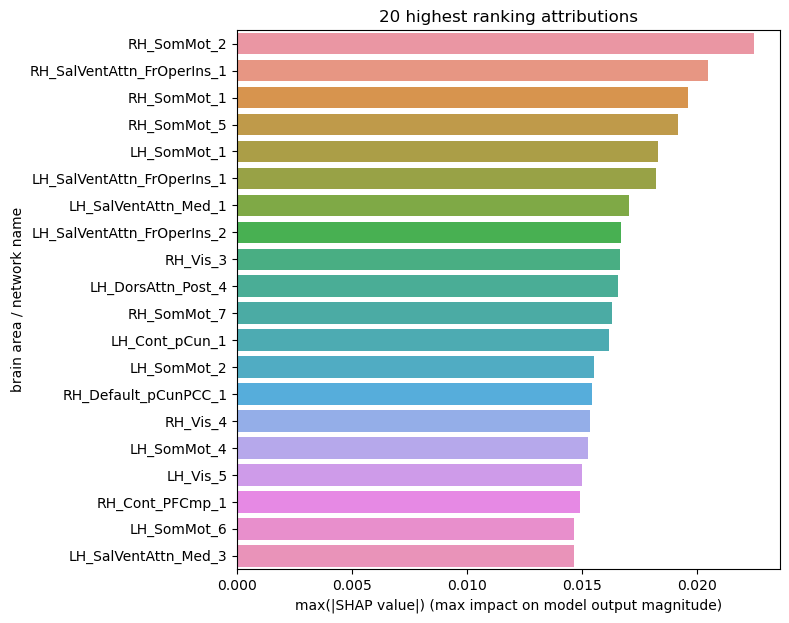

In [13]:
subset = deep_shap_df.sort_values(by=['max SHAP'], ascending=False)[:20].copy()
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(data=subset,
            x='max SHAP',
            y='brain area',
            orient='h',
            ax=ax)
ax.set(xlabel='max(|SHAP value|) (max impact on model output magnitude)',
       ylabel='brain area / network name',
       title='20 highest ranking attributions')
plt.show()

## Create long table for easier visualisations

In [162]:
shap_df = utils.create_long_df(deep_shap)

In [163]:
shap_df

,id,parcellation,hemisphere,network,area,shap,mean area shap,area weight
0,1084205,LH_Vis_1,LH,Vis,full Vis,0.001303,0.001266,1.000
1,1364685,LH_Vis_1,LH,Vis,full Vis,0.001206,0.001266,1.000
2,1378042,LH_Vis_1,LH,Vis,full Vis,0.001294,0.001266,1.000
3,1243331,LH_Vis_1,LH,Vis,full Vis,0.001356,0.001266,1.000
4,1174601,LH_Vis_1,LH,Vis,full Vis,0.001195,0.001266,1.000
...,...,...,...,...,...,...,...,...
499995,1264831,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,0.001355,0.001224,0.125
499996,1251835,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,0.001240,0.001224,0.125
499997,1525394,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,0.001284,0.001224,0.125
499998,1238019,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,0.001364,0.001224,0.125


In [7]:
network_colour_map = viz.get_colour_map('network')
area_colour_map = viz.get_colour_map('area')

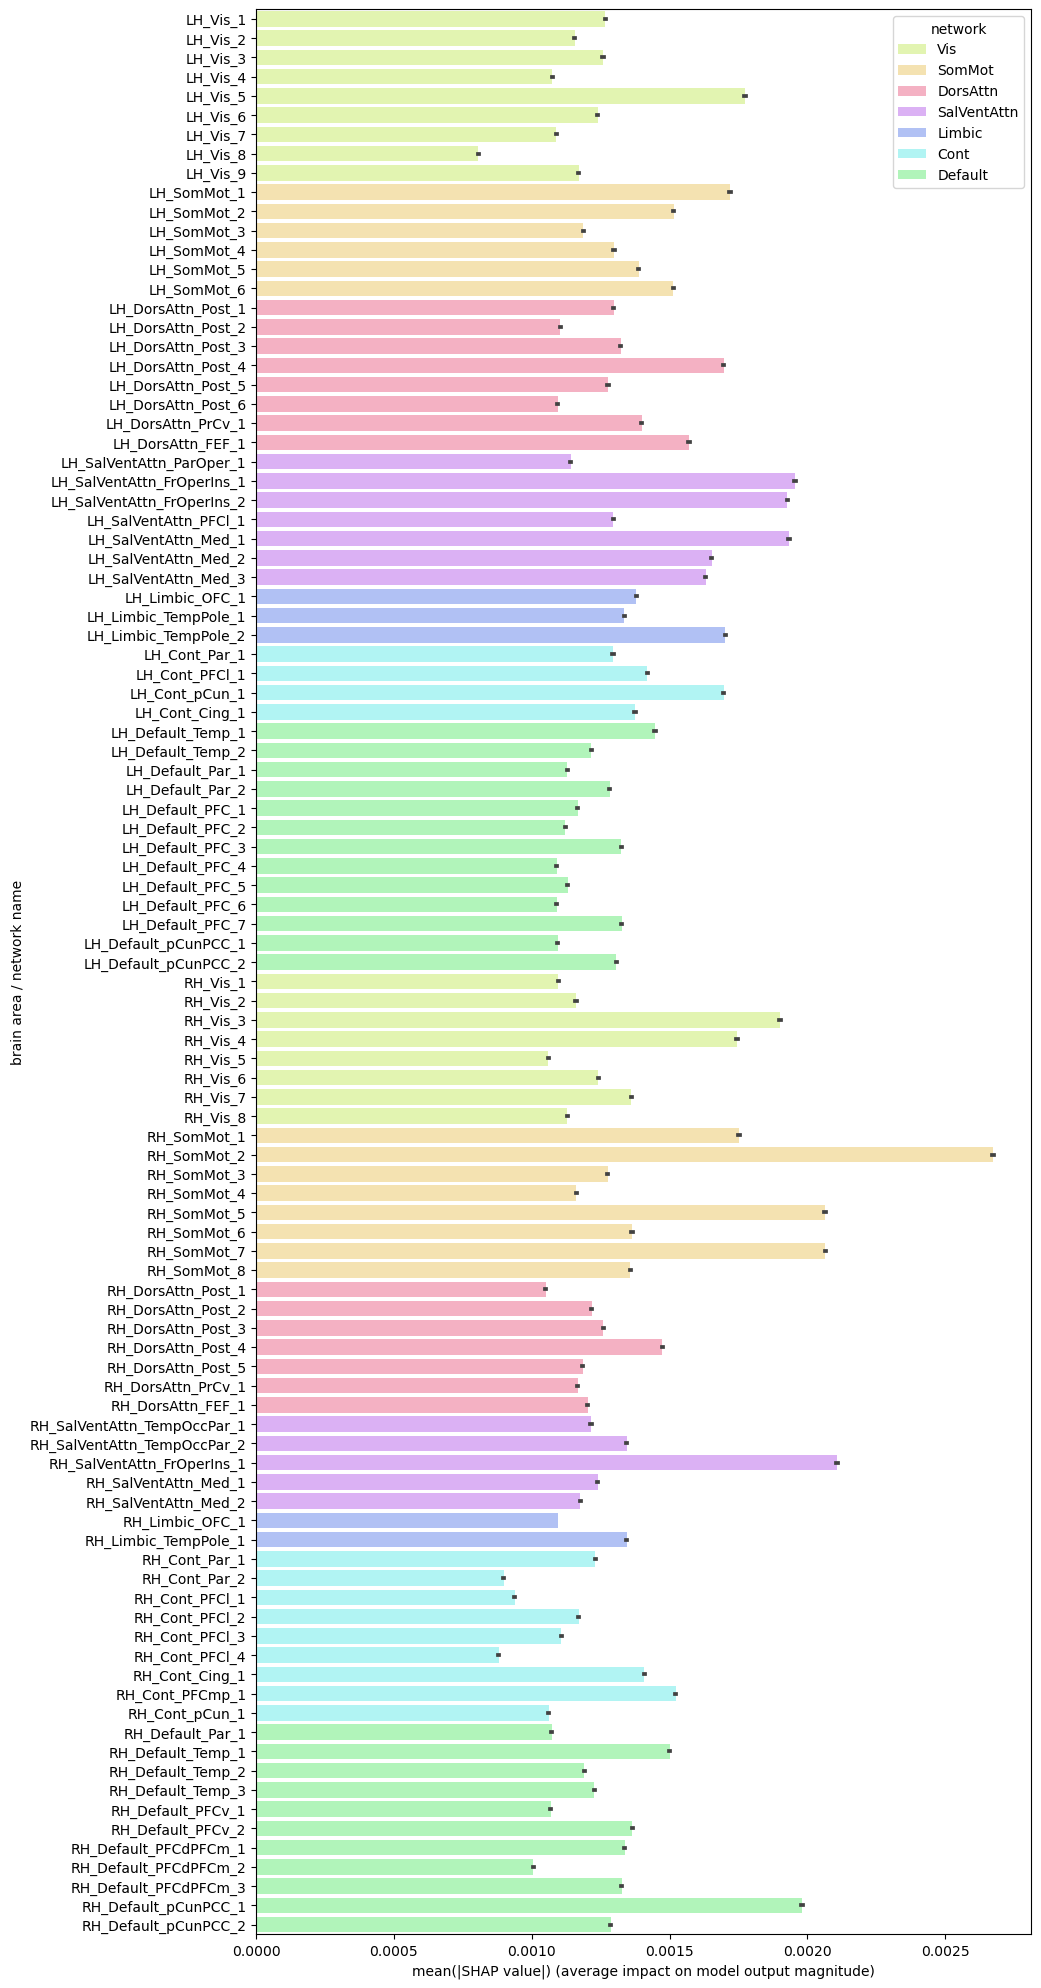

In [10]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=shap_df,
            x='shap',
            y='parcellation',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name')
plt.show()

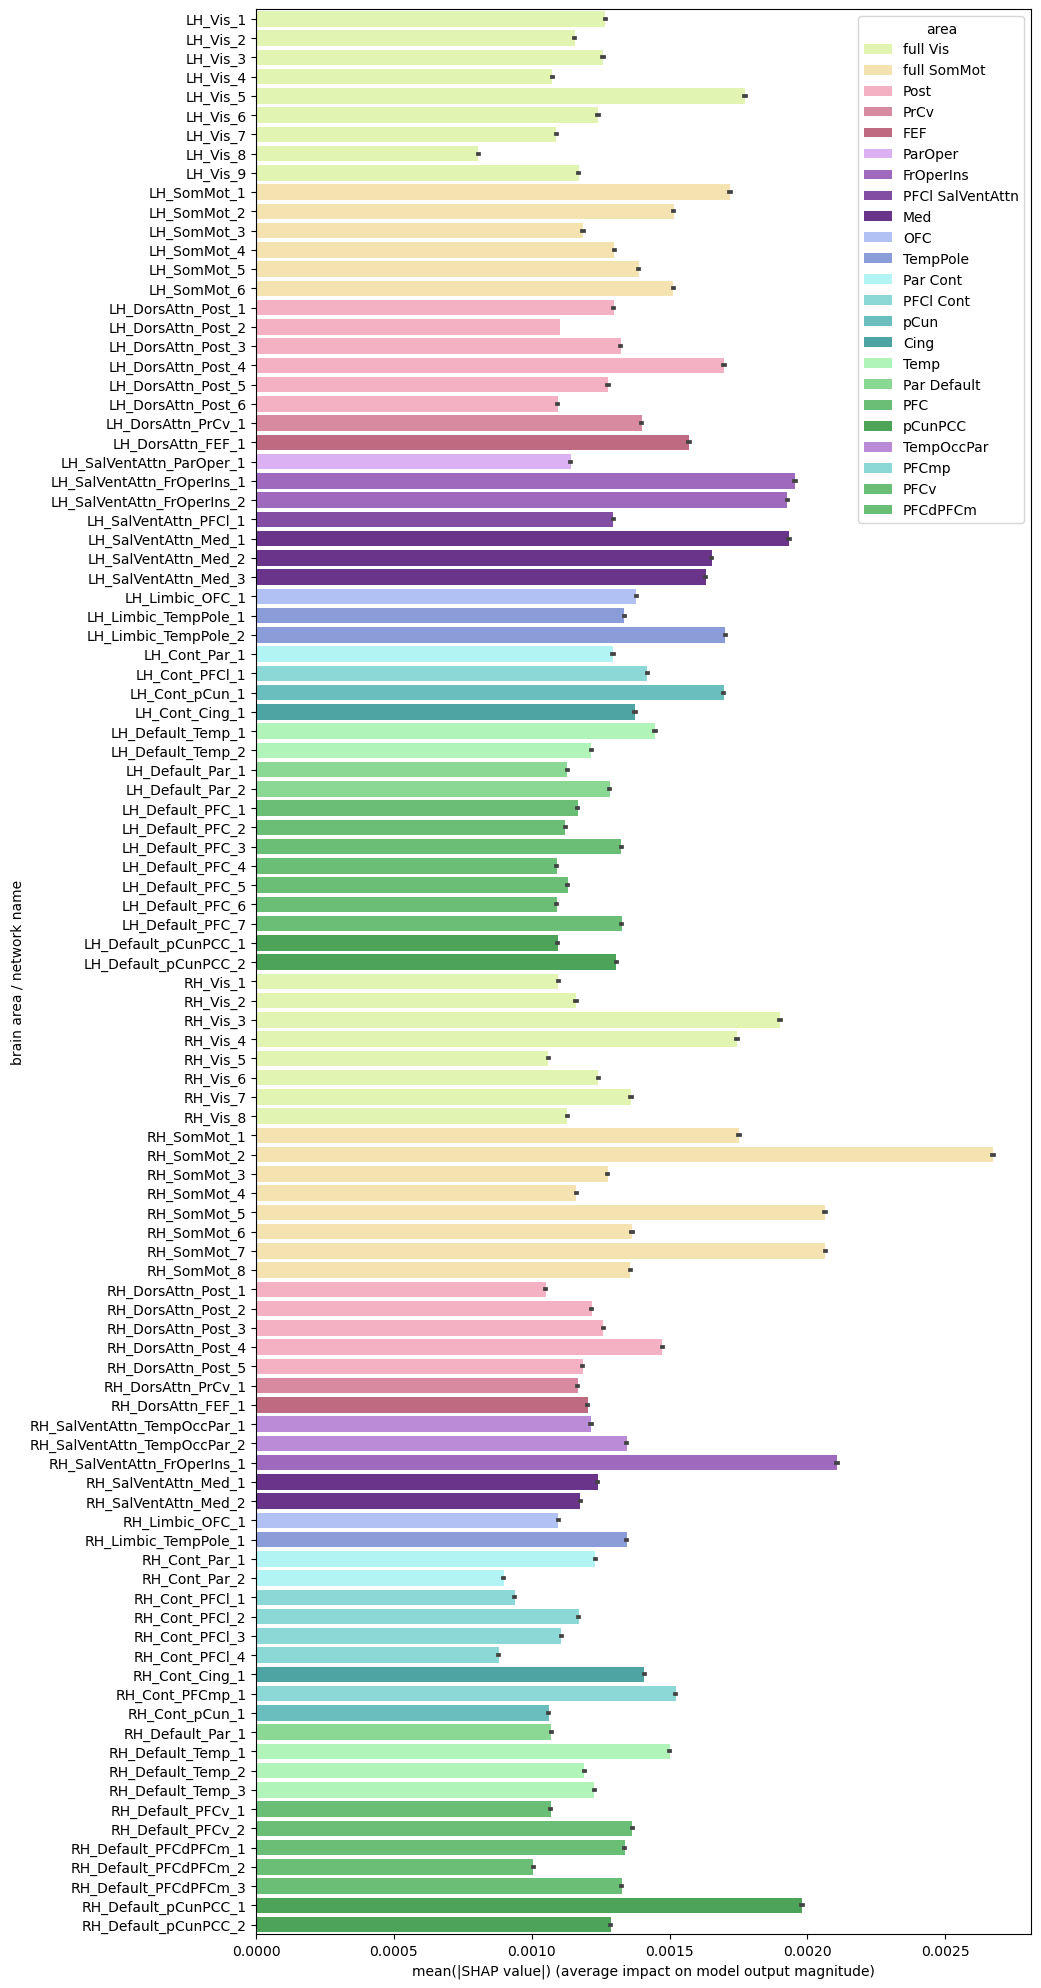

In [11]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=shap_df,
            x='shap',
            y='parcellation',
            orient='h',
            hue='area',
            palette=area_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name')
plt.show()

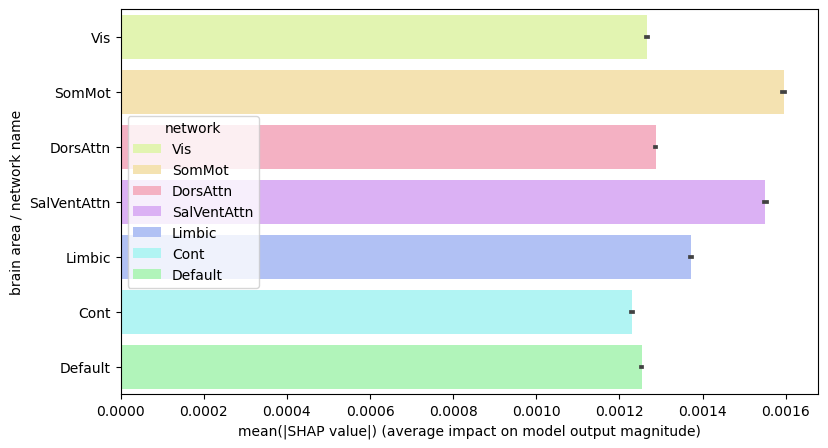

In [118]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=shap_df,
            x='shap',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name')
plt.show()

In [168]:
weighted_networks_df = utils.get_weighted_network_average(shap_df)

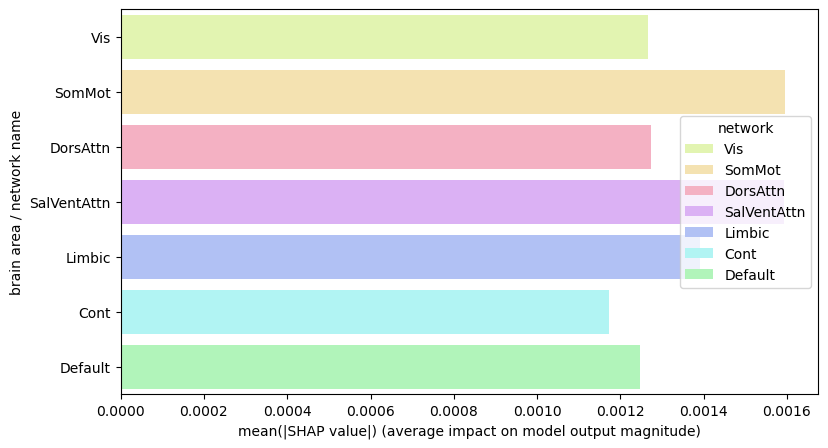

In [169]:
# weighted network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=weighted_networks_df,
            x='shap weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean(|SHAP value|) (average impact on model output magnitude)',
       ylabel='brain area / network name')
plt.show()

In [87]:
shap_df.loc[:,['shap','network']].groupby('network').mean()

,shap
network,
Cont,0.001231
Default,0.001254
DorsAttn,0.001288
Limbic,0.001371
SalVentAttn,0.001552
SomMot,0.001595
Vis,0.001266


In [102]:
shap_df.loc[:,['shap','network','area']].groupby(['network','area']).mean()

shap
network     area                      
Cont        Cing              0.001391
            PFCl Cont         0.001103
            PFCmp             0.001522
            Par Cont          0.001141
            pCun              0.001378
Default     PFC               0.001179
            PFCdPFCm          0.001224
            PFCv              0.001217
            Par Default       0.001161
            Temp              0.001316
            pCunPCC           0.001417
DorsAttn    FEF               0.001387
            Post              0.001271
            PrCv              0.001282
Limbic      OFC               0.001237
            TempPole          0.001461
SalVentAttn FrOperIns         0.001997
            Med               0.001526
            PFCl SalVentAttn  0.001296
            ParOper           0.001141
            TempOccPar        0.001280
SomMot      full SomMot       0.001595
Vis         full Vis          0.001266

In [170]:
weighted_networks_df

,network,shap weighted mean
0,Vis,0.001266
1,SomMot,0.001595
2,DorsAttn,0.001275
3,SalVentAttn,0.001592
4,Limbic,0.001392
5,Cont,0.001173
6,Default,0.001247
